In [9]:
import skrf
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['axes.grid'] = True

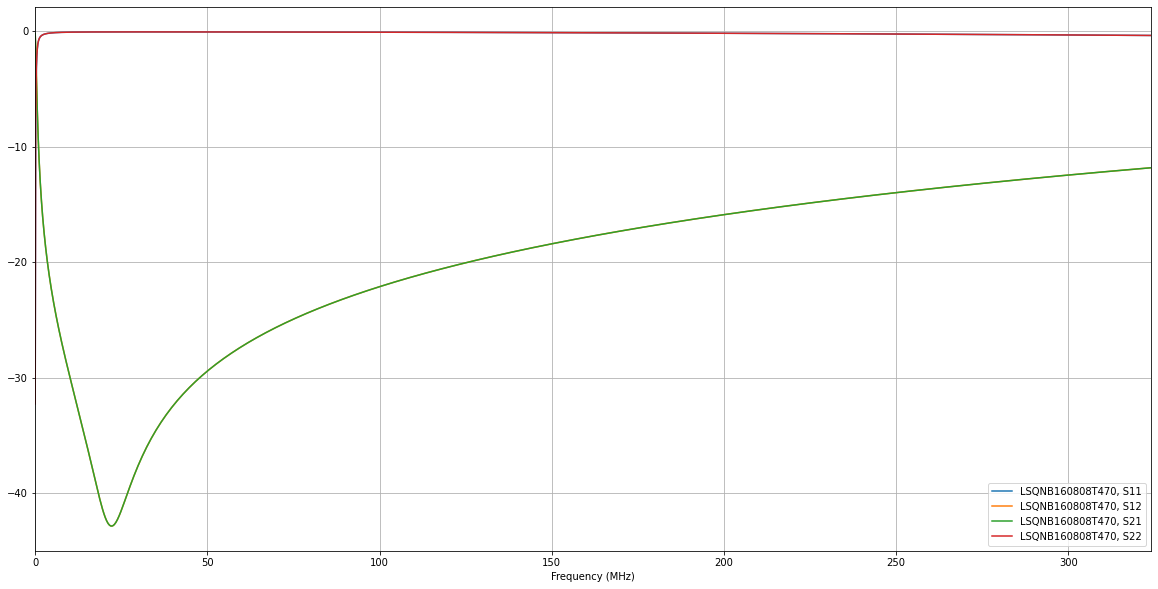

In [2]:
ind_47uh = skrf.Network('LSQNB160808T470.s2p')
ind_47uh.plot_s_db()

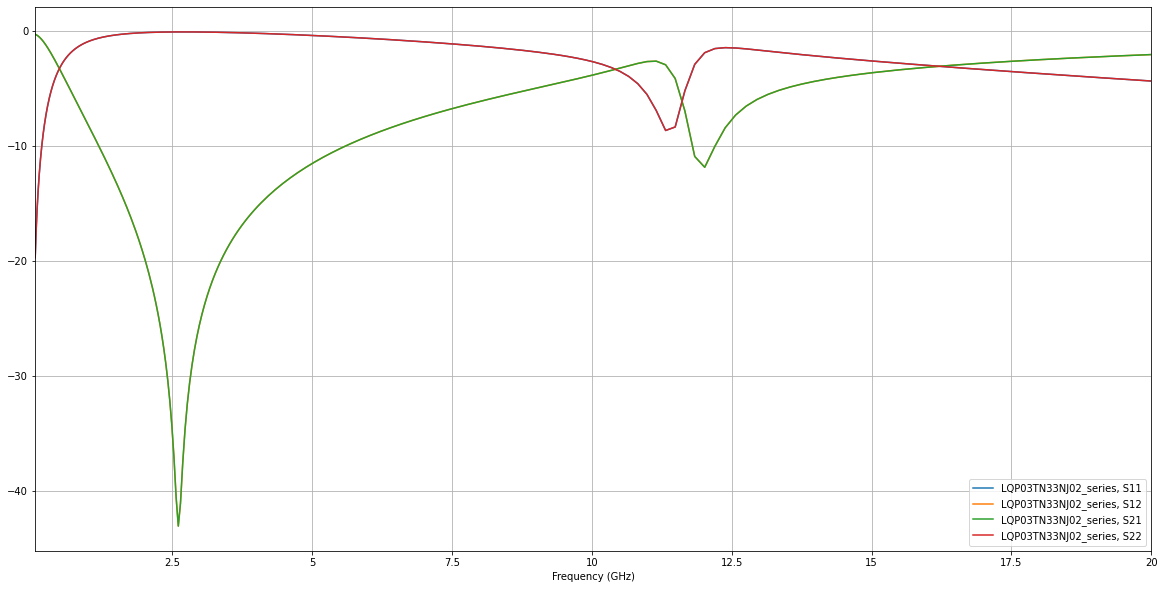

In [3]:
ind_33nh = skrf.Network('LQP03TN33NJ02_series.s2p', f_unit='GHz')
ind_33nh.plot_s_db()

In [4]:
def inductor_model(freq, inductance, parallel_capacitance, name='L'):
    media = skrf.DefinedGammaZ0(frequency=freq, z0=50, gamma=1j*freq.w/skrf.c)
    L = media.inductor(inductance, name='L')
    Cp = media.capacitor(parallel_capacitance, name='Cp')
    Rp = media.resistor(24e3, name='Rp')
    port1 = skrf.Circuit.Port(freq, name='port1', z0=50)
    port2 = skrf.Circuit.Port(freq, name='port2', z0=50)
    connections = [
        [(port1, 0), (Cp, 0), (L, 0), (Rp, 0)],
        [(port2, 0), (Cp, 1), (L, 1), (Rp, 1)],
    ]
    cir = skrf.Circuit(connections)
    n = cir.network
    n.name = name
    return n


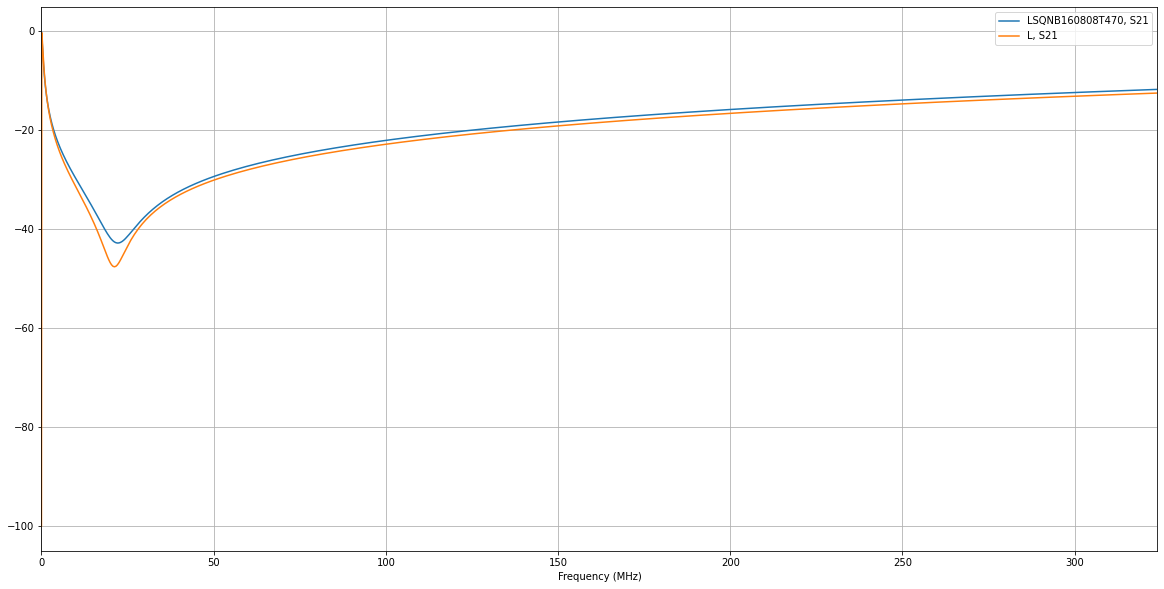

In [8]:
ind_47uh_model = inductor_model(ind_47uh.frequency, 47e-6, 1.2e-12)
ind_47uh.plot_s_db(n=0, m=1)
ind_47uh_model.plot_s_db(n=0, m=1)

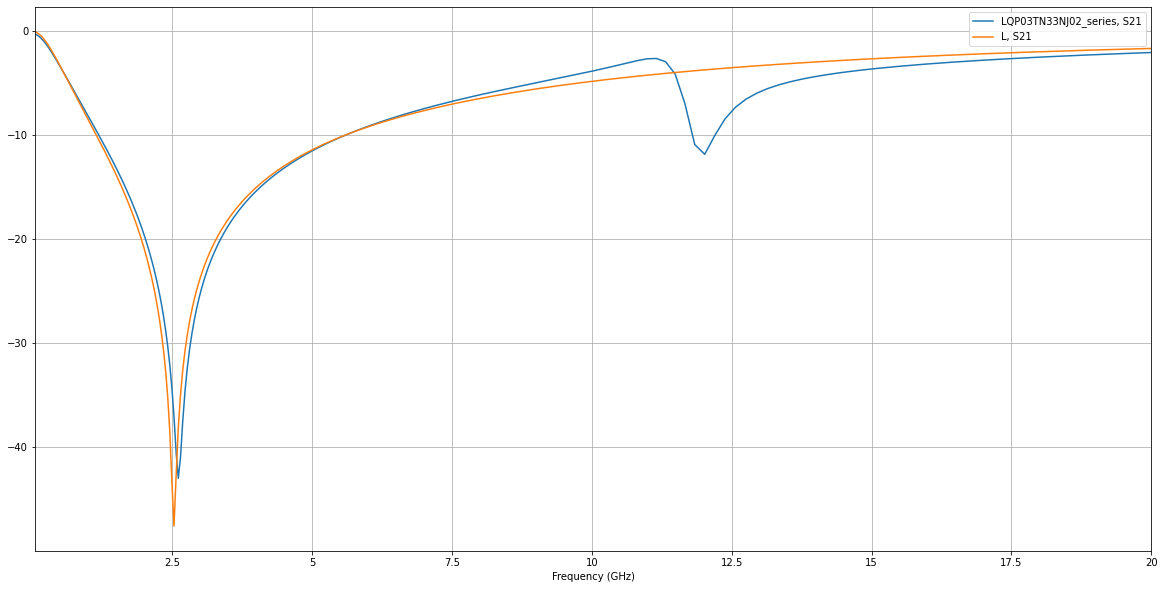

In [6]:
ind_33nh_model = inductor_model(ind_33nh.frequency, 33e-9, 120e-15)
ind_33nh.plot_s_db(n=0, m=1)
ind_33nh_model.plot_s_db(n=0, m=1)

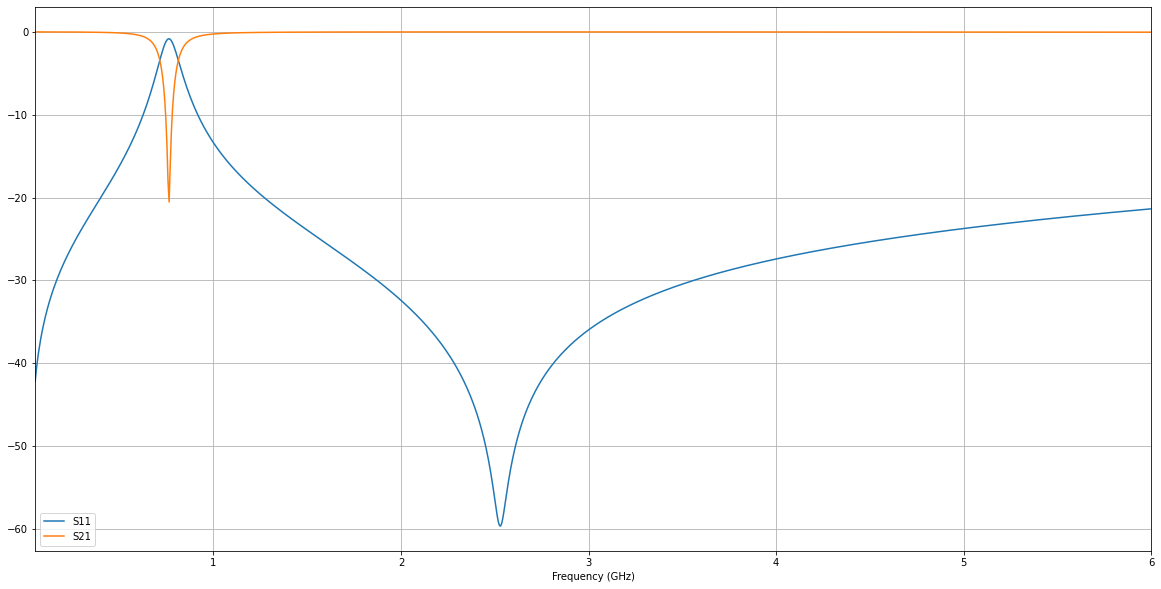

In [7]:
def model_rfchoke(freq, L1, L2):
    port1 = skrf.Circuit.Port(freq, name='port1', z0=50)
    port2 = skrf.Circuit.Port(freq, name='port2', z0=50)
    ground = skrf.Circuit.Ground(freq, name='ground')
    connections = [
        [(port1, 0), (L1, 0), (port2, 0)],
        [(L1, 1), (L2, 0)],
        [(L2, 1), (ground, 0)],
    ]
    cir = skrf.Circuit(connections)
    return cir.network

def plot(freq, L1, C1p, L2, C2p):
    L1_model = inductor_model(freq, inductance=L1, parallel_capacitance=C1p, name='L1')
    L2_model = inductor_model(freq, inductance=L2, parallel_capacitance=C2p, name='L2')
    model_rfchoke(freq, L1_model, L2_model).plot_s_db(n=0)

freq = skrf.Frequency(start=50e-3, stop=6, npoints=1001, unit='GHz')
plot(freq, 33e-9, 120e-15, 47e-6, 1.2e-12)